# Data Analysis on Stroke Diagnosis

## Data Visualization

### Load the Data set

In [2]:
import pandas as pd  

# Load the dataset  
df = pd.read_csv("stroke_data.csv")  

# Display the first few rows  
print(df.head())  


         Age  Gender     SES  Hypertension  Heart_Disease        BMI  \
0  66.788137    Male  Medium             1              0  25.842521   
1  86.393609  Female  Medium             1              1  32.531061   
2  76.158579  Female  Medium             1              0  40.681244   
3  72.477870  Female     Low             0              1  33.003193   
4  59.881635    Male     Low             0              0  26.062443   

   Avg_Glucose  Diabetes Smoking_Status  Stroke  
0    96.428681         1        Current       1  
1   133.350068         0          Never       1  
2   111.489589         0          Never       0  
3   125.692465         0         Former       0  
4   123.218486         1          Never       1  


### Handle missing vales

In [3]:
# Check for missing values
print(df.isnull().sum())


Age               0
Gender            0
SES               0
Hypertension      0
Heart_Disease     0
BMI               0
Avg_Glucose       0
Diabetes          0
Smoking_Status    0
Stroke            0
dtype: int64


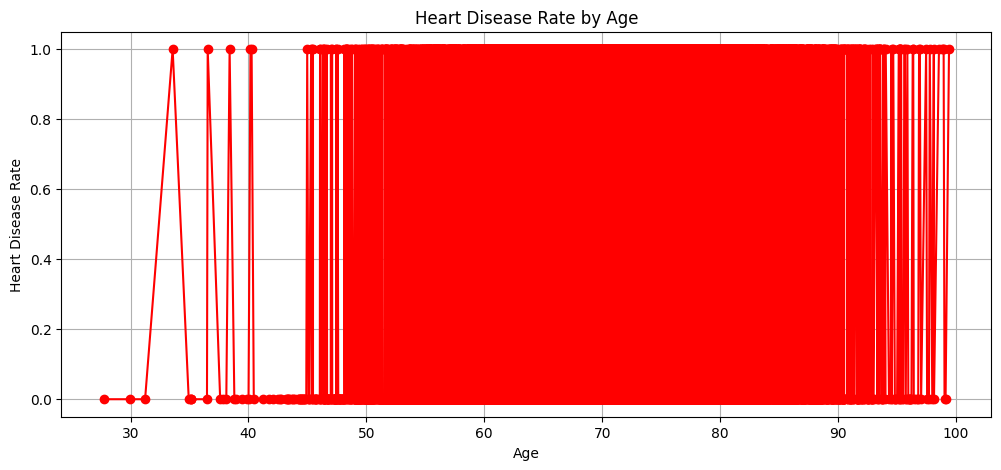

In [4]:
import matplotlib.pyplot as plt

# Group data by Age and calculate heart disease rate
age_heart_disease = df.groupby("Age")["Heart_Disease"].mean()

# Plot the line chart
plt.figure(figsize=(12, 5))
plt.plot(age_heart_disease.index, age_heart_disease.values, marker='o', linestyle='-', color='red')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Heart Disease Rate")
plt.title("Heart Disease Rate by Age")
plt.grid(True)

# Show the plot
plt.show()


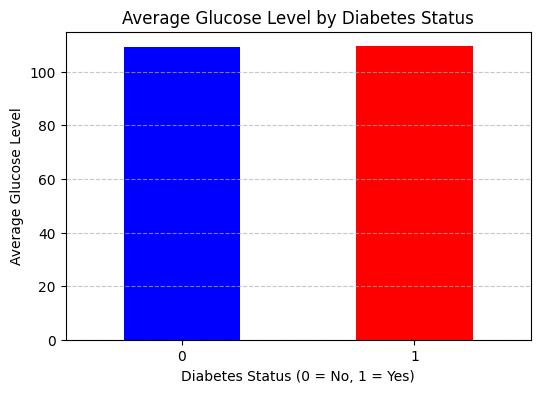

In [5]:
# Calculate average glucose level for each diabetes category
diabetes_glucose = df.groupby("Diabetes")["Avg_Glucose"].mean()

# Plot bar chart
plt.figure(figsize=(6, 4))
diabetes_glucose.plot(kind="bar", color=["blue", "red"])
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.title("Average Glucose Level by Diabetes Status")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

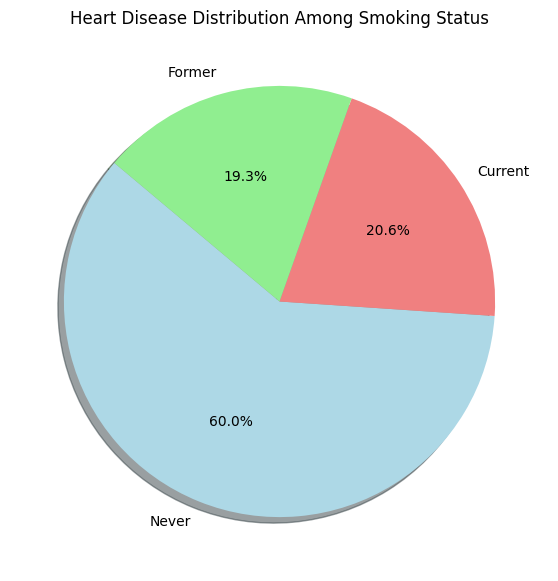

In [6]:
# Calculate the count of heart disease cases for each smoking status
heart_disease_smoking = df[df["Heart_Disease"] == 1]["Smoking_Status"].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(heart_disease_smoking, labels=heart_disease_smoking.index, autopct="%1.1f%%", 
        colors=["lightblue", "lightcoral", "lightgreen", "gold"], startangle=140, shadow=True)

plt.title("Heart Disease Distribution Among Smoking Status")
plt.show()


C:\Users\SHARMA\AppData\Local\Temp\ipykernel_8380\2877099773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y="Age", data=df, palette=["blue", "red"])


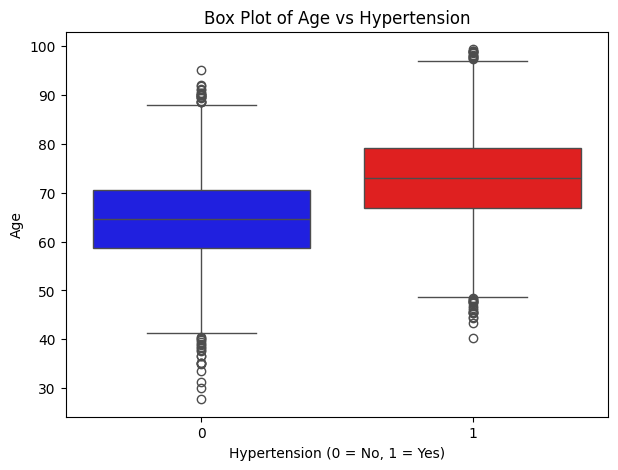

In [9]:
import seaborn as sns
# Plot box plot
plt.figure(figsize=(7, 5))
sns.boxplot(x="Hypertension", y="Age", data=df, palette=["blue", "red"])

# Labels and title
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Box Plot of Age vs Hypertension")

# Show plot
plt.show()


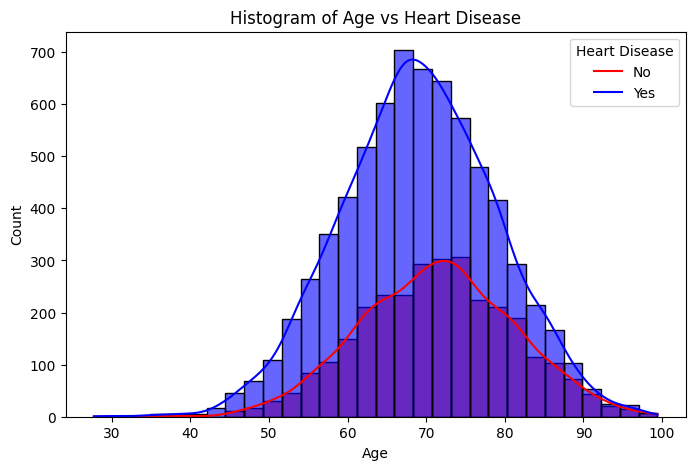

In [10]:

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Age", hue="Heart_Disease", bins=30, kde=True, palette=["blue", "red"], alpha=0.6)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age vs Heart Disease")
plt.legend(title="Heart Disease", labels=["No", "Yes"])

# Show plot
plt.show()


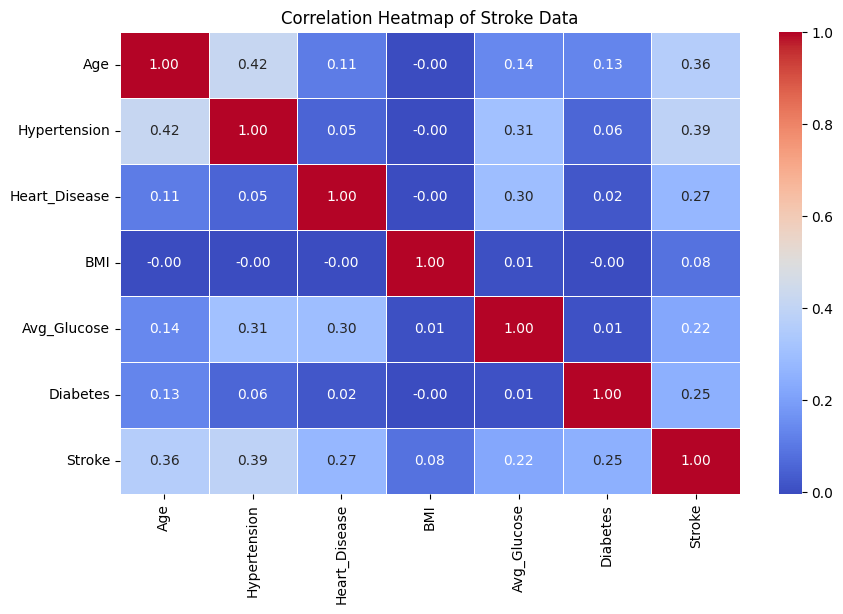

In [11]:

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Stroke Data")
plt.show()


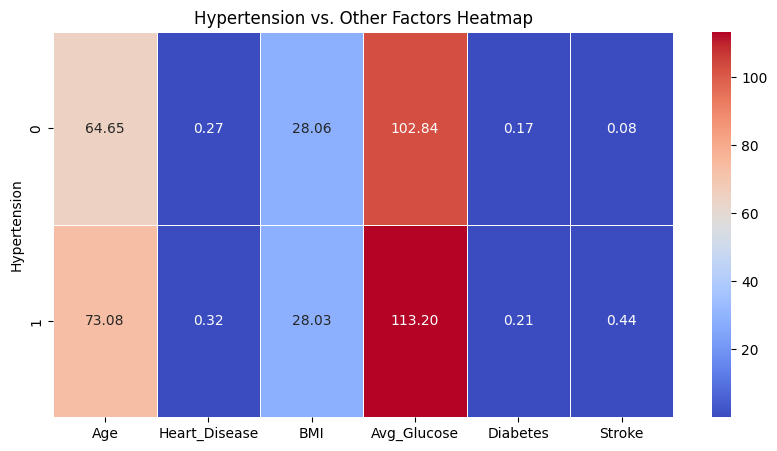

In [12]:
# Drop non-numeric columns before computing mean
df_numeric = df.select_dtypes(include=["number"])

# Compute mean values for each group
hypertension_heatmap = df_numeric.groupby("Hypertension").mean()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(hypertension_heatmap, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title
plt.title("Hypertension vs. Other Factors Heatmap")
plt.show()

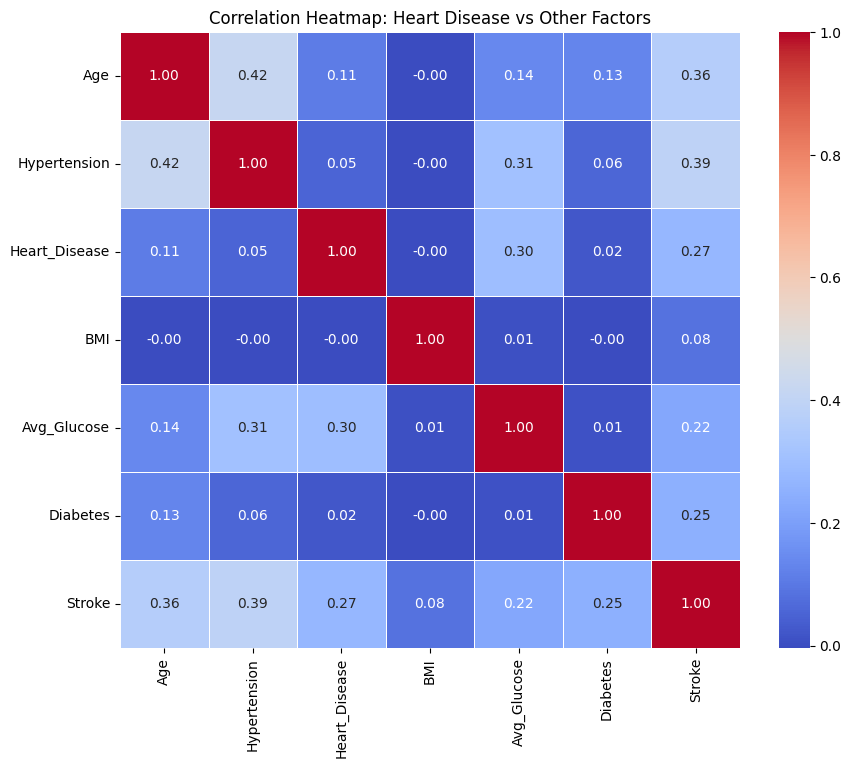

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Heart Disease vs Other Factors')
plt.show()

### Bayesian Theorem

In [14]:
# Total number of individuals
total_individuals = len(df)

# Number of individuals with heart disease
heart_disease_count = df['Heart_Disease'].sum()

# P(Heart_Disease)
p_heart_disease = heart_disease_count / total_individuals
print(f"P(Heart_Disease): {p_heart_disease:.4f}")

# Number of individuals who smoke and have heart disease
smoking_and_heart_disease = df[(df['Smoking_Status'] == 'Current') & (df['Heart_Disease'] == 1)].shape[0]

# P(Smoking | Heart_Disease)
p_smoking_given_heart_disease = smoking_and_heart_disease / heart_disease_count
print(f"P(Smoking | Heart_Disease): {p_smoking_given_heart_disease:.4f}")

# Number of individuals who smoke
smoking_count = df[df['Smoking_Status'] == 'Current'].shape[0]

# P(Smoking)
p_smoking = smoking_count / total_individuals
print(f"P(Smoking): {p_smoking:.4f}")

# Calculate P(Heart_Disease | Smoking)
p_heart_disease_given_smoking = (p_smoking_given_heart_disease * p_heart_disease) / p_smoking
print(f"P(Heart_Disease | Smoking): {p_heart_disease_given_smoking:.4f}")

P(Heart_Disease): 0.3028
P(Smoking | Heart_Disease): 0.2064
P(Smoking): 0.2062
P(Heart_Disease | Smoking): 0.3031


In [15]:
# Total number of individuals
total_individuals = len(df)

# Number of individuals with hypertension
hypertension_count = df['Hypertension'].sum()

# P(Hypertension)
p_hypertension = hypertension_count / total_individuals
print(f"P(Hypertension): {p_hypertension:.4f}")

# Number of individuals who smoke and have hypertension
smoking_and_hypertension = df[(df['Smoking_Status'] == 'Current') & (df['Hypertension'] == 1)].shape[0]

# P(Smoking | Hypertension)
p_smoking_given_hypertension = smoking_and_hypertension / hypertension_count
print(f"P(Smoking | Hypertension): {p_smoking_given_hypertension:.4f}")

# Number of individuals who smoke
smoking_count = df[df['Smoking_Status'] == 'Current'].shape[0]

# P(Smoking)
p_smoking = smoking_count / total_individuals
print(f"P(Smoking): {p_smoking:.4f}")

# Calculate P(Hypertension | Smoking)
p_hypertension_given_smoking = (p_smoking_given_hypertension * p_hypertension) / p_smoking
print(f"P(Hypertension | Smoking): {p_hypertension_given_smoking:.4f}")

P(Hypertension): 0.6058
P(Smoking | Hypertension): 0.2093
P(Smoking): 0.2062
P(Hypertension | Smoking): 0.6149


In [16]:
# Total number of individuals
total_individuals = len(df)

# Number of individuals with heart disease
heart_disease_count = df['Heart_Disease'].sum()

# P(Heart_Disease)
p_heart_disease = heart_disease_count / total_individuals
print(f"P(Heart_Disease): {p_heart_disease:.4f}")

# Number of individuals with heart disease and age > 70
age_gt_70_and_heart_disease = df[(df['Age'] > 70) & (df['Heart_Disease'] == 1)].shape[0]

# P(Age > 70 | Heart_Disease)
p_age_gt_70_given_heart_disease = age_gt_70_and_heart_disease / heart_disease_count
print(f"P(Age > 70 | Heart_Disease): {p_age_gt_70_given_heart_disease:.4f}")

# Number of individuals with age > 70
age_gt_70_count = df[df['Age'] > 70].shape[0]

# P(Age > 70)
p_age_gt_70 = age_gt_70_count / total_individuals
print(f"P(Age > 70): {p_age_gt_70:.4f}")

# Calculate P(Heart_Disease | Age > 70)
p_heart_disease_given_age_gt_70 = (p_age_gt_70_given_heart_disease * p_heart_disease) / p_age_gt_70
print(f"P(Heart_Disease | Age > 70): {p_heart_disease_given_age_gt_70:.4f}")



P(Heart_Disease): 0.3028
P(Age > 70 | Heart_Disease): 0.5647
P(Age > 70): 0.4912
P(Heart_Disease | Age > 70): 0.3481


In [17]:
# Total number of individuals
total_individuals = len(df)

# Number of individuals with hypertension
hypertension_count = df['Hypertension'].sum()

# P(Hypertension)
p_hypertension = hypertension_count / total_individuals
print(f"P(Hypertension): {p_hypertension:.4f}")

# Number of individuals with hypertension and age > 70
age_gt_70_and_hypertension = df[(df['Age'] > 70) & (df['Hypertension'] == 1)].shape[0]

# P(Age > 70 | Hypertension)
p_age_gt_70_given_hypertension = age_gt_70_and_hypertension / hypertension_count
print(f"P(Age > 70 | Hypertension): {p_age_gt_70_given_hypertension:.4f}")

# Number of individuals with age > 70
age_gt_70_count = df[df['Age'] > 70].shape[0]

# P(Age > 70)
p_age_gt_70 = age_gt_70_count / total_individuals
print(f"P(Age > 70): {p_age_gt_70:.4f}")

# Calculate P(Hypertension | Age > 70)
p_hypertension_given_age_gt_70 = (p_age_gt_70_given_hypertension * p_hypertension) / p_age_gt_70
print(f"P(Hypertension | Age > 70): {p_hypertension_given_age_gt_70:.4f}")

P(Hypertension): 0.6058
P(Age > 70 | Hypertension): 0.6349
P(Age > 70): 0.4912
P(Hypertension | Age > 70): 0.7830


### Remove Outliers

In [18]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers for Age, BMI, and Avg_Glucose
df_filtered = remove_outliers_iqr(df, 'Age')
df_filtered = remove_outliers_iqr(df_filtered, 'BMI')
df_filtered = remove_outliers_iqr(df_filtered, 'Avg_Glucose')

# Check the shape of the filtered dataset
print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")

Original dataset shape: (10000, 10)
Filtered dataset shape: (9855, 10)


### Calculate Mean,Median,Mode

In [19]:
# Mean and Median for Age
mean_age = df_filtered['Age'].mean()
median_age = df_filtered['Age'].median()
print(f"Mean Age (after removing outliers): {mean_age:.2f}")
print(f"Median Age (after removing outliers): {median_age:.2f}")

# Mean and Median for BMI
mean_bmi = df_filtered['BMI'].mean()
median_bmi = df_filtered['BMI'].median()
print(f"Mean BMI (after removing outliers): {mean_bmi:.2f}")
print(f"Median BMI (after removing outliers): {median_bmi:.2f}")

# Mean and Median for Average Glucose Level
mean_glucose = df_filtered['Avg_Glucose'].mean()
median_glucose = df_filtered['Avg_Glucose'].median()
print(f"Mean Glucose Level (after removing outliers): {mean_glucose:.2f}")
print(f"Median Glucose Level (after removing outliers): {median_glucose:.2f}")

Mean Age (after removing outliers): 69.78
Median Age (after removing outliers): 69.80
Mean BMI (after removing outliers): 28.01
Median BMI (after removing outliers): 28.06
Mean Glucose Level (after removing outliers): 109.18
Median Glucose Level (after removing outliers): 109.05


In [20]:
# Mode for Gender
mode_gender = df_filtered['Gender'].mode()[0]
print(f"Mode of Gender (after removing outliers): {mode_gender}")

# Mode for Smoking Status
mode_smoking_status = df_filtered['Smoking_Status'].mode()[0]
print(f"Mode of Smoking Status (after removing outliers): {mode_smoking_status}")

# Mode for SES
mode_ses = df_filtered['SES'].mode()[0]
print(f"Mode of SES (after removing outliers): {mode_ses}")

Mode of Gender (after removing outliers): Female
Mode of Smoking Status (after removing outliers): Never
Mode of SES (after removing outliers): Medium


### Calculate Standard Deviation and Range

In [21]:
# Standard Deviation and Range for Age
std_age = df_filtered['Age'].std()
range_age = df_filtered['Age'].max() - df_filtered['Age'].min()
print(f"Standard Deviation of Age: {std_age:.2f}")
print(f"Range of Age: {range_age:.2f}")

# Standard Deviation and Range for BMI
std_bmi = df_filtered['BMI'].std()
range_bmi = df_filtered['BMI'].max() - df_filtered['BMI'].min()
print(f"Standard Deviation of BMI: {std_bmi:.2f}")
print(f"Range of BMI: {range_bmi:.2f}")

# Standard Deviation and Range for Average Glucose Level
std_glucose = df_filtered['Avg_Glucose'].std()
range_glucose = df_filtered['Avg_Glucose'].max() - df_filtered['Avg_Glucose'].min()
print(f"Standard Deviation of Glucose Level: {std_glucose:.2f}")
print(f"Range of Glucose Level: {range_glucose:.2f}")

Standard Deviation of Age: 9.66
Range of Age: 53.00
Standard Deviation of BMI: 4.85
Range of BMI: 26.38
Standard Deviation of Glucose Level: 15.97
Range of Glucose Level: 88.47


### T-Testing

In [22]:
import math

# Separate BMI values for heart disease and non-heart disease groups
bmi_heart_disease = df[df["Heart_Disease"] == 1]["BMI"].dropna()
bmi_no_heart_disease = df[df["Heart_Disease"] == 0]["BMI"].dropna()

# Calculate means
mean_heart_disease = bmi_heart_disease.mean()
mean_no_heart_disease = bmi_no_heart_disease.mean()

# Calculate standard deviations
std_heart_disease = bmi_heart_disease.std()
std_no_heart_disease = bmi_no_heart_disease.std()

# Sample sizes
n1 = len(bmi_heart_disease)
n2 = len(bmi_no_heart_disease)

# Compute Standard Error (SE)
SE = math.sqrt((std_heart_disease**2 / n1) + (std_no_heart_disease**2 / n2))

# Compute t-statistic
t_stat = (mean_heart_disease - mean_no_heart_disease) / SE

# Compute degrees of freedom (Welch's approximation)
df_numerator = ((std_heart_disease**2 / n1) + (std_no_heart_disease**2 / n2)) ** 2
df_denominator = ((std_heart_disease**2 / n1) ** 2 / (n1 - 1)) + ((std_no_heart_disease**2 / n2) ** 2 / (n2 - 1))
df = df_numerator / df_denominator

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df:.4f}")

# Interpretation (We need a t-table or p-value lookup for significance)
alpha = 0.05  # Common significance level
if abs(t_stat) > 2:  # Approximate critical value for large df
    print("Reject the null hypothesis: BMI is significantly different for individuals with heart disease.")
else:
    print("Fail to reject the null hypothesis: No significant difference in BMI between groups.")


T-statistic: -0.2353
Degrees of Freedom: 5856.4205
Fail to reject the null hypothesis: No significant difference in BMI between groups.


Features for Linear Regression
We are predicting "Stroke" as the dependent variable (target), and we can test different independent variables:

Age → Stroke is more common in older individuals.
BMI → Higher BMI might indicate stroke risk.
Avg_Glucose → High glucose levels could be a risk factor.
Hypertension & Heart Disease → Strong medical indicators for stroke.

Model Accuracy: 0.7450


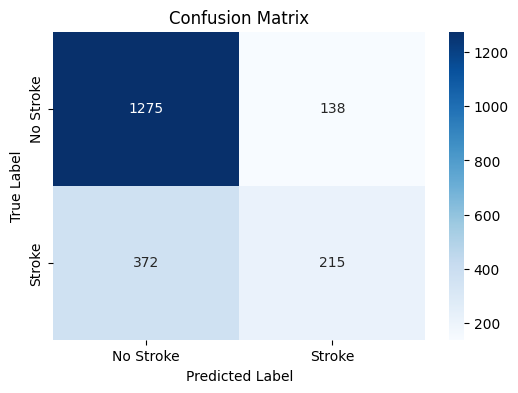

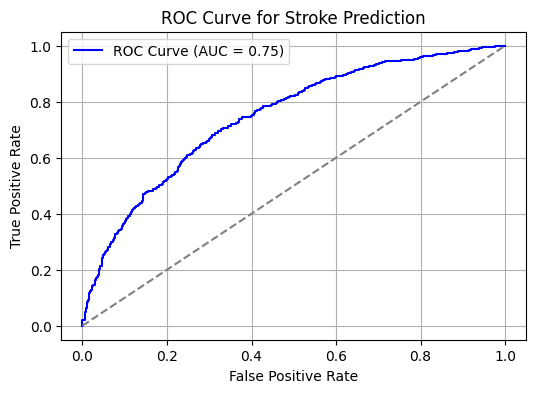

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("stroke_data.csv")

# Select features and target variable
X = df[["Age", "BMI", "Avg_Glucose"]]  # Independent variables
y = df["Stroke"]  # Dependent variable (0 or 1)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict stroke values
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of stroke

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

#  1. Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#  2. ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Stroke Prediction")
plt.legend()
plt.grid(True)
plt.show()

